In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Comp ML/Assessment-1/Concrete Regression/Concrete_Data.xls')
df.columns = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Concrete Compressive Strength']
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Comp ML/Assessment-1/Concrete Regression/Concrete_Data.csv', index=False)

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Comp ML/Assessment-1/Concrete Regression/Concrete_Data.csv')
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete Compressive Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


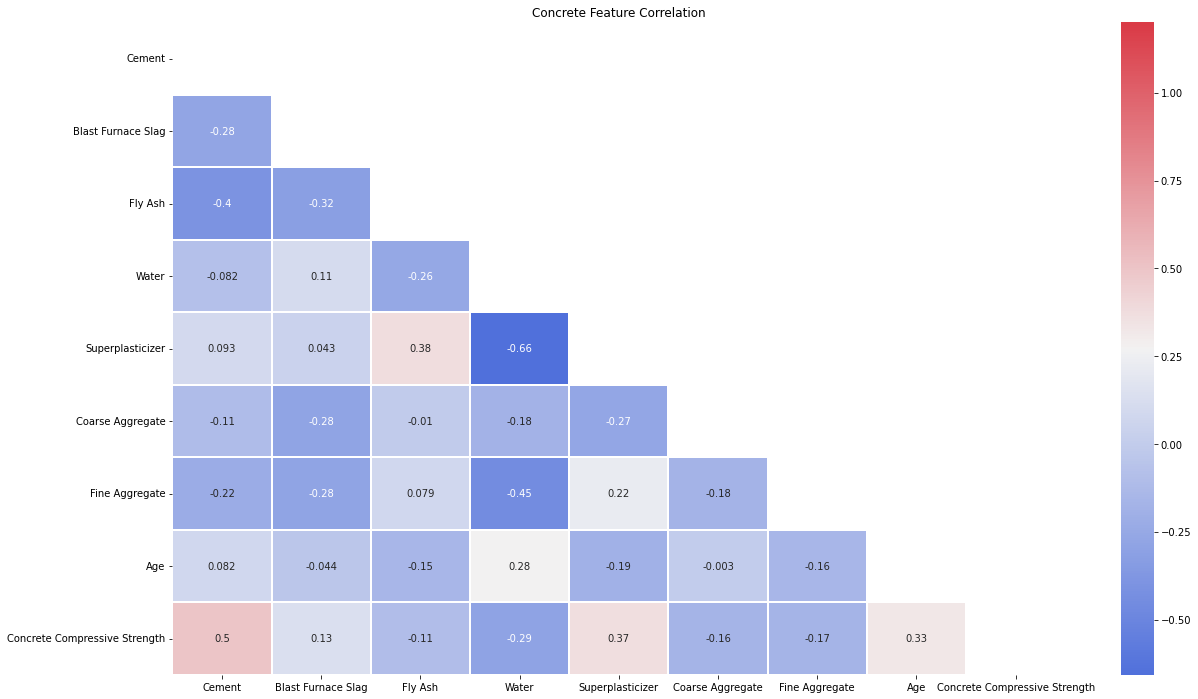

In [24]:
corrMatt = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Concrete Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, ax=ax, annot=True, fmt='.2g', linewidths=1);

##Outliers

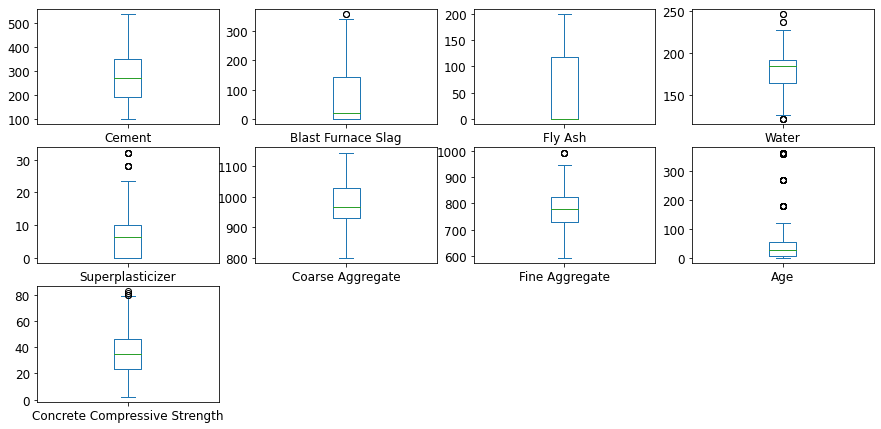

In [25]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(8,4), sharex=False, sharey=False, fontsize=12, figsize=(15,20));

##to check need for normalisation

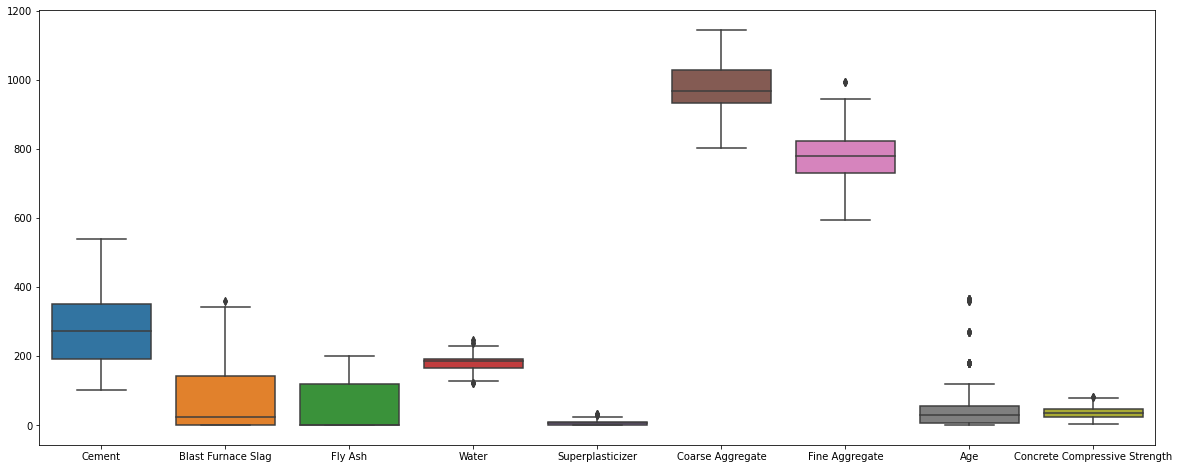

In [26]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=df.iloc[:, :],ax=ax)

In [50]:
X = df.drop('Concrete Compressive Strength', axis=1)
Y = df['Concrete Compressive Strength']

In [53]:
cols = list(X.columns.values)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X[cols] = min_max_scaler.fit_transform(X[cols])

In [54]:
X.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,1.000000,0.000000,0.0,0.321357,0.07764,0.694767,0.205720,0.074176
1,1.000000,0.000000,0.0,0.321357,0.07764,0.738372,0.205720,0.074176
2,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,0.739011
3,0.526256,0.396494,0.0,0.848303,0.00000,0.380814,0.000000,1.000000
4,0.220548,0.368392,0.0,0.560878,0.00000,0.515698,0.580783,0.986264


In [56]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y, test_size=0.20)
print(Y_train.shape)
print(X_train.shape)

(824,)
(824, 8)


In [77]:
from sklearn.svm import SVR
SVM = SVR(kernel = 'poly')
SVM.fit(X_train , Y_train)
Y_pred = SVM.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test, Y_pred)

60.78917860369897

In [76]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,Y_train)
Y_pred = LR.predict(X_test)
mean_squared_error(Y_test, Y_pred)

101.11606037754521